# GMM and EM
Gaussian Mixture Models and Expectation Maximization.

Run EM many times with random init. Use antilog values.

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn.mixture import GaussianMixture

In [2]:
try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/'  # must end in "/"
except:
    IN_COLAB = False
    DATA_DIR = 'D:/Adjeroh/Localization/TrainTest/'   # Windows
    DATA_DIR = '/Users/jasonmiller/WVU/Localization/TrainTest/'    # Mac
print(DATA_DIR)

/Users/jasonmiller/WVU/Localization/TrainTest/


In [3]:
GENES_FILE =    'CNRCI_noncoding_train_genes.csv'
RCI_FILE =      'CNRCI_noncoding_train_RCI.gc42.csv'

In [4]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080','HUVEC','MCF.7','NCI.H460','NHEK',\
     'SK.MEL.5','SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()

CELL_LINE = 0
print('Cell line for today',CELL_LINE,all_cell_lines[CELL_LINE])
EXCLUSIONS = [1,7]
for c in EXCLUSIONS:
    print('Exclude cell line',c,all_cell_lines[c])

Cell line for today 0 A549
Exclude cell line 1 H1.hESC
Exclude cell line 7 NCI.H460


In [5]:
class RCI_Loader():
    def __init__(self):
        self.cache=dict() 
        
    def load_gene_rci_values(self,filepath,cell_line):
        '''
        Load from RCI csv file.
        Return dict with keys=gene:str and values=RCI:float.
        '''
        gene_to_rci = {}
        overall_sum = 0
        with open (filepath,'r') as handle:
            header = None
            for row in handle:
                if header is None:
                    header = row # skip file's header line
                else:
                    line = row.strip()
                    fields = line.split(',')
                    gene_id = fields.pop(0)
                    rci_str = fields[cell_line]
                    if rci_str != "nan":
                        rci_val = float(rci_str)
                        gene_to_rci[gene_id] = rci_val
        return gene_to_rci

In [13]:
def plot(X,left=None,right=None,discrim=None,num_bins=100):
    pyplot.hist(X, bins=num_bins, density=True)
    if left is not None:
        pyplot.axvline(x=left,color='y')
    if right is not None:
        pyplot.axvline(x=right,color='y')
    if discrim is not None:
        pyplot.axvline(x=discrim,color='r')
    pyplot.show()
    
def show_gmm(model,X):
    print(model)
    print('AIC',model.aic(X),'BIC',model.bic(X),'score',model.score(X))
    for i in range(model.n_components):
        print('Gaussian',i,'mean=',model.means_[i],
            'wgt=',model.weights_[i], 'cov=',model.covariances_[i])

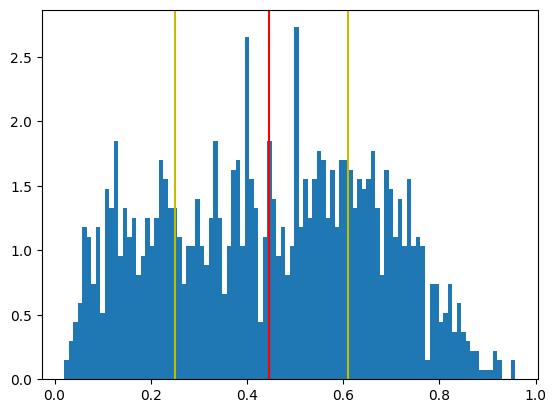

Cell Line 0 A549
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -269.0182802362439 BIC -258.46378478298095 score 0.09433941957022941
Gaussian 0 mean= [0.44521692] wgt= 1.0 cov= 0.048483328621034105
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -417.9467372260281 BIC -391.5604985928707 score 0.14787378618729374
Gaussian 0 mean= [0.60988421] wgt= 0.5425757910676398 cov= 0.017050490024303783
Gaussian 1 mean= [0.24989606] wgt= 0.45742420893236035 cov= 0.015454337613182273
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -457.9859727378926 BIC -415.7679909248407 score 0.16378229880369474
Gaussian 0 mean= [0.67482588] wgt= 0.3550118783437669 cov= 0.010084180421586568
Gaussian 1 mean= [0.18044222] wgt= 0.29766988266916017 cov= 0.0068132567505342625
Gaussian 2 mean= [0.43744751] wgt= 0.34731823898707287 cov= 0.009413835029675076


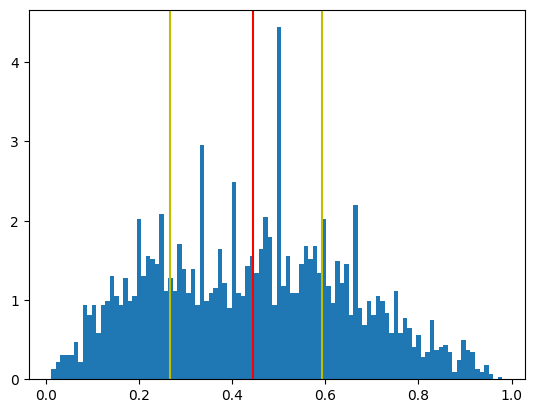

Cell Line 1 H1.hESC
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -902.1332442282468 BIC -889.9135916762099 score 0.1361787262140437
Gaussian 0 mean= [0.44514622] wgt= 1.0 cov= 0.044591496791277024
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -1083.186441503674 BIC -1052.6373101235815 score 0.16429011744870362
Gaussian 0 mean= [0.26637138] wgt= 0.4536665632923078 cov= 0.01422929679799302
Gaussian 1 mean= [0.59359798] wgt= 0.5463334367076922 cov= 0.02122641465369171
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -1143.3455375853518 BIC -1094.466927377204 score 0.17423287309668647
Gaussian 0 mean= [0.21634253] wgt= 0.3371069642555685 cov= 0.007844867079686435
Gaussian 1 mean= [0.69248746] wgt= 0.27817010861125885 cov= 0.01298784307897202
Gaussian 2 mean= [0.46679394] wgt= 0.3847229271331726 cov= 0.009066483777202731


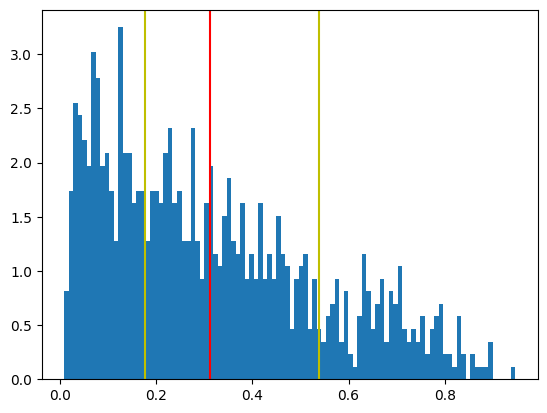

Cell Line 2 HeLa.S3
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -165.9257594827505 BIC -156.27918723803913 score 0.09245144694382508
Gaussian 0 mean= [0.31180269] wgt= 1.0 cov= 0.04866674129990954
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -347.9381640988009 BIC -323.82173348702247 score 0.19474328841066424
Gaussian 0 mean= [0.53911422] wgt= 0.37423601121410666 cov= 0.027845716094813983
Gaussian 1 mean= [0.17585981] wgt= 0.6257639887858933 cov= 0.011736833313760223
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -418.57776774406796 BIC -379.99147876522244 score 0.23644057004573882
Gaussian 0 mean= [0.12283693] wgt= 0.44498896946894106 cov= 0.00495093977036729
Gaussian 1 mean= [0.66996981] wgt= 0.1869148164237395 cov= 0.012153895657460915
Gaussian 2 mean= [0.35836915] wgt= 0.36809621410731935 cov= 0.009578682820482963


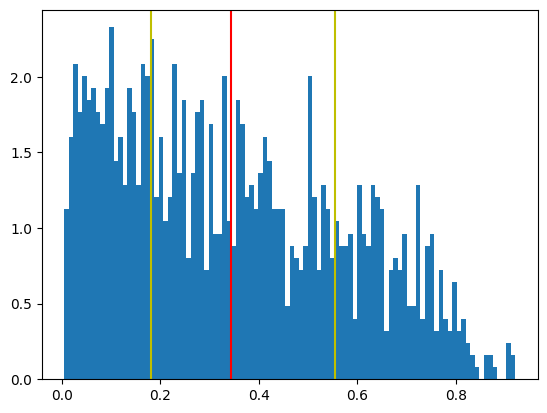

Cell Line 3 HepG2
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -177.33429494575816 BIC -166.90087597233924 score 0.06656912442942664
Gaussian 0 mean= [0.34257] wgt= 1.0 cov= 0.05125224772232309
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -399.5651169294619 BIC -373.48156949591464 score 0.1503543013691123
Gaussian 0 mean= [0.55518058] wgt= 0.4326088875352281 cov= 0.022269070415105424
Gaussian 1 mean= [0.18046449] wgt= 0.5673911124647719 cov= 0.012607006724056116
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -481.08773754618437 BIC -439.35406165250873 score 0.1824844851491132
Gaussian 0 mean= [0.34781816] wgt= 0.3233160366200744 cov= 0.008335213999800401
Gaussian 1 mean= [0.6268424] wgt= 0.2938212271487588 cov= 0.013409290723643134
Gaussian 2 mean= [0.11997826] wgt= 0.3828627362311668 cov= 0.004949138657305937


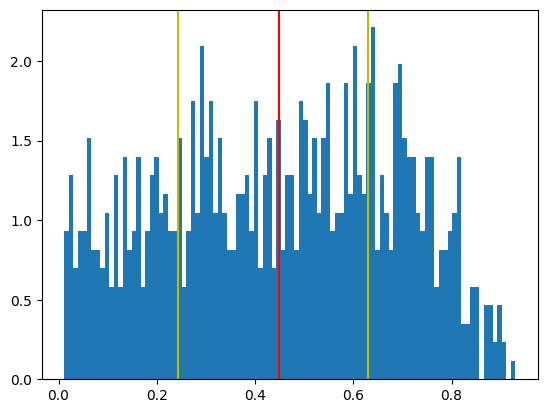

Cell Line 4 HT1080
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -57.08481820204331 BIC -47.401587249088124 score 0.032630778954082965
Gaussian 0 mean= [0.44976546] wgt= 1.0 cov= 0.05485179356332001
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -165.14705276384944 BIC -140.9389753814615 score 0.09356145980974863
Gaussian 0 mean= [0.63083645] wgt= 0.5329650607274099 cov= 0.017061192754146554
Gaussian 1 mean= [0.24313315] wgt= 0.46703493927259004 cov= 0.01786517003862588
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -179.6742749179403 BIC -140.94135110611955 score 0.1045268562595835
Gaussian 0 mean= [0.42478109] wgt= 0.3427851054007789 cov= 0.011878412485708588
Gaussian 1 mean= [0.68787115] wgt= 0.37448597170038556 cov= 0.010310217273666182
Gaussian 2 mean= [0.16467625] wgt= 0.2827289228988355 cov= 0.008823942942140945


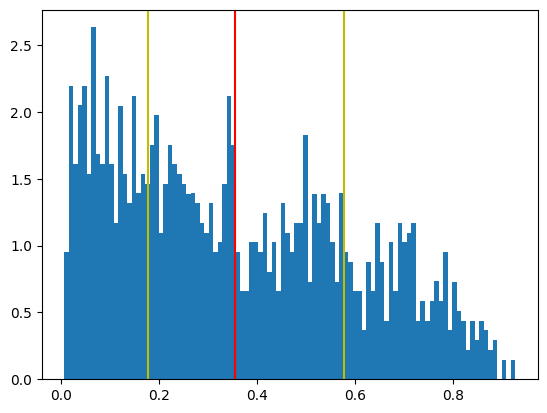

Cell Line 5 HUVEC
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -45.78698495956086 BIC -35.176608528774786 score 0.016729497634261042
Gaussian 0 mean= [0.35563505] wgt= 1.0 cov= 0.05662422389102323
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -329.05201873339115 BIC -302.52607765642597 score 0.11392876973568251
Gaussian 0 mean= [0.17766424] wgt= 0.5539243156644631 cov= 0.012289157501195488
Gaussian 1 mean= [0.57663423] wgt= 0.44607568433553696 cov= 0.02350622933483379
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -389.5022882953934 BIC -347.0607825722491 score 0.13625748934657037
Gaussian 0 mean= [0.40749687] wgt= 0.3427284474442456 cov= 0.012354731418504876
Gaussian 1 mean= [0.13531184] wgt= 0.4270309981188152 cov= 0.00660813962889975
Gaussian 2 mean= [0.68707242] wgt= 0.23024055443693928 cov= 0.01140128712886526


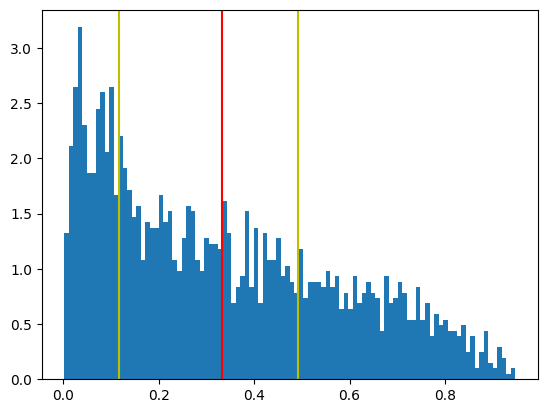

Cell Line 6 MCF.7
GaussianMixture(covariance_type='spherical', n_init=10)
AIC 54.49064223121418 BIC 65.84266209527196 score -0.011709332613917945
Gaussian 0 mean= [0.33172836] wgt= 1.0 cov= 0.05993817184415222
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -544.6320960129078 BIC -516.2520463527634 score 0.12862525417739049
Gaussian 0 mean= [0.11563769] wgt= 0.42540422159621055 cov= 0.005898979863019884
Gaussian 1 mean= [0.49171192] wgt= 0.5745957784037894 cov= 0.03978059961761152
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -690.6722604228507 BIC -645.2641809666196 score 0.1638850325655962
Gaussian 0 mean= [0.33458814] wgt= 0.40257097314824325 cov= 0.01477152022781844
Gaussian 1 mean= [0.67111923] wgt= 0.24709477568775004 cov= 0.015453589107357028
Gaussian 2 mean= [0.08906588] wgt= 0.3503342511640067 cov= 0.003078301881669107


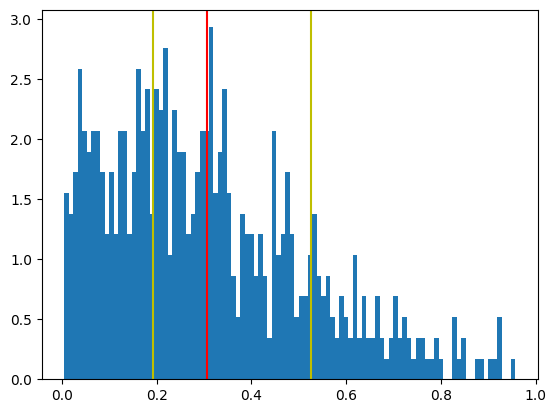

Cell Line 7 NCI.H460
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -179.46891544208557 BIC -170.64199752775085 score 0.15038435691974228
Gaussian 0 mean= [0.30614652] wgt= 1.0 cov= 0.04334245201655888
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -263.9859398368649 BIC -241.91864505102808 score 0.22457863921054497
Gaussian 0 mean= [0.1928324] wgt= 0.6586963640878337 cov= 0.013088778222838547
Gaussian 1 mean= [0.52483624] wgt= 0.3413036359121663 cov= 0.029124471499152677
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -280.9733793266537 BIC -245.66570766931483 score 0.2434208027267653
Gaussian 0 mean= [0.33557256] wgt= 0.3874759921953276 cov= 0.00994377841506054
Gaussian 1 mean= [0.61145784] wgt= 0.20408320018571555 cov= 0.022248545104021994
Gaussian 2 mean= [0.12567778] wgt= 0.40844080761895685 cov= 0.00560007803089495


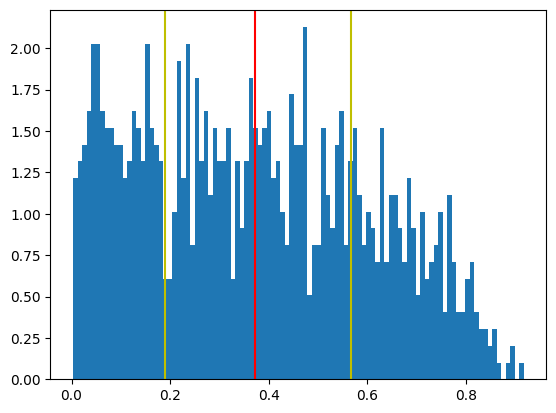

Cell Line 8 NHEK
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -97.31790263260538 BIC -87.34846999236885 score 0.046906436403983974
Gaussian 0 mean= [0.37104023] wgt= 1.0 cov= 0.05330787659218958
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -223.68695534536533 BIC -198.76337374477401 score 0.10818840525248395
Gaussian 0 mean= [0.19028773] wgt= 0.5184517212981137 cov= 0.014661554844983415
Gaussian 1 mean= [0.56564469] wgt= 0.48154827870188627 cov= 0.02186971899935683
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -282.6579767733857 BIC -242.78024621243958 score 0.13826758183953042
Gaussian 0 mean= [0.37194715] wgt= 0.3654843964701604 cov= 0.010085207358620922
Gaussian 1 mean= [0.646979] wgt= 0.3019283033777427 cov= 0.012428626300667682
Gaussian 2 mean= [0.11954178] wgt= 0.3325873001520969 cov= 0.005541142547346472


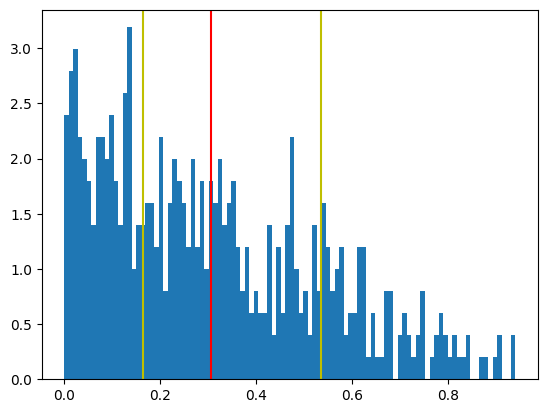

Cell Line 9 SK.MEL.5
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -73.86458029902836 BIC -65.30378862110797 score 0.07290691039234866
Gaussian 0 mean= [0.30581079] wgt= 1.0 cov= 0.050606708776164244
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -165.01940151485834 BIC -143.61742232005736 score 0.1638758441150359
Gaussian 0 mean= [0.16475803] wgt= 0.6207112335249202 cov= 0.012630815134845862
Gaussian 1 mean= [0.53664554] wgt= 0.37928876647507986 cov= 0.02691021546668057
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -208.34995142150655 BIC -174.10678470982498 score 0.2100654975856803
Gaussian 0 mean= [0.2824413] wgt= 0.337881896780003 cov= 0.008021025833311225
Gaussian 1 mean= [0.56974644] wgt= 0.31887664625074663 cov= 0.02350680705461497
Gaussian 2 mean= [0.08361505] wgt= 0.34324145696925046 cov= 0.0030780071513376887


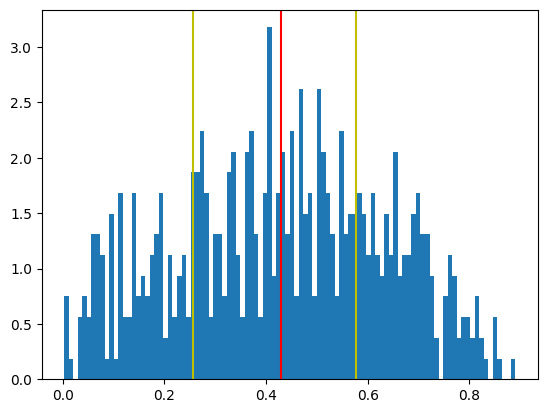

Cell Line 10 SK.N.DZ
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -184.37907334444697 BIC -175.5752389509926 score 0.15620155335360444
Gaussian 0 mean= [0.42848037] wgt= 1.0 cov= 0.042841122523157915
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -210.77913444198072 BIC -188.7695484583448 score 0.18306727565670042
Gaussian 0 mean= [0.57717814] wgt= 0.5355315763234777 cov= 0.017118978143243563
Gaussian 1 mean= [0.257032] wgt= 0.46446842367652236 cov= 0.01761019253498633
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -219.3313914920039 BIC -184.1160539181864 score 0.195133823791048
Gaussian 0 mean= [0.42406286] wgt= 0.38577562919863373 cov= 0.008191135008083576
Gaussian 1 mean= [0.65179311] wgt= 0.3270893157078181 cov= 0.009457576769252766
Gaussian 2 mean= [0.18002919] wgt= 0.28713505509354814 cov= 0.008861448183676629


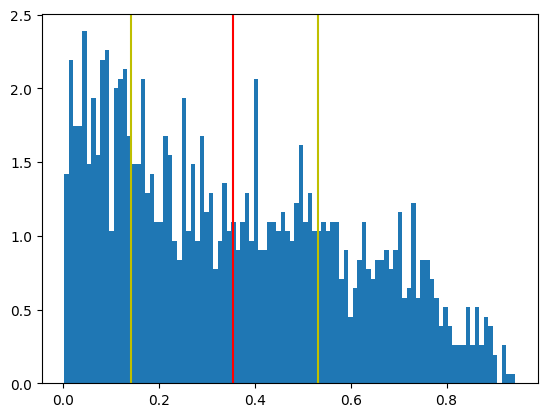

Cell Line 11 SK.N.SH
GaussianMixture(covariance_type='spherical', n_init=10)
AIC 24.55902434295773 BIC 35.37244580331301 score -0.006241355295372717
Gaussian 0 mean= [0.35515236] wgt= 1.0 cov= 0.059286272718222593
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -324.95091181160853 BIC -297.9173581607203 score 0.10168515841275305
Gaussian 0 mean= [0.53174195] wgt= 0.5475982311484136 cov= 0.032312649387479825
Gaussian 1 mean= [0.14140399] wgt= 0.4524017688515864 cov= 0.008501703798104122
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -383.32837385786075 BIC -340.0746880164396 score 0.12122901452879804
Gaussian 0 mean= [0.40283617] wgt= 0.35327590463868774 cov= 0.012059831056077995
Gaussian 1 mean= [0.12271463] wgt= 0.4122584346593887 cov= 0.005965886481152336
Gaussian 2 mean= [0.69199861] wgt= 0.2344656607019236 cov= 0.01230939113272153


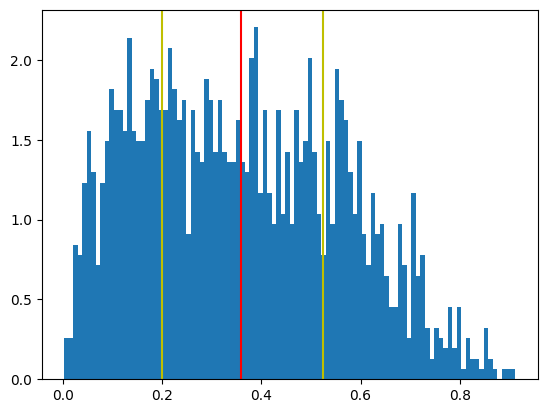

Cell Line 12 GM12878
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -600.4665065387094 BIC -589.5920938049668 score 0.17799367094779428
Gaussian 0 mean= [0.35903422] wgt= 1.0 cov= 0.04101407303445678
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -778.0403873102882 BIC -750.8543554759318 score 0.2320495840136302
Gaussian 0 mean= [0.20085271] wgt= 0.5119380141105335 cov= 0.010923313800723816
Gaussian 1 mean= [0.52495397] wgt= 0.48806198588946653 cov= 0.018802071534665815
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -810.6949046755083 BIC -767.1972537405379 score 0.24343195072894824
Gaussian 0 mean= [0.15205192] wgt= 0.3610925873888332 cov= 0.0055000069253730325
Gaussian 1 mean= [0.59307741] wgt= 0.30733356633220477 cov= 0.012762928721562565
Gaussian 2 mean= [0.36751029] wgt= 0.33157384627896186 cov= 0.008376367078391149


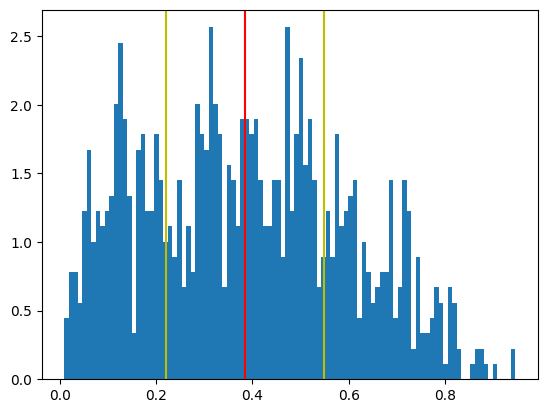

Cell Line 13 K562
GaussianMixture(covariance_type='spherical', n_init=10)
AIC -250.46395954965362 BIC -240.7342639937119 score 0.13280999976495492
Gaussian 0 mean= [0.38564324] wgt= 1.0 cov= 0.04489293749425316
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -311.43153582063894 BIC -287.1072969307846 score 0.16776176191056313
Gaussian 0 mean= [0.54960501] wgt= 0.5026403714259532 cov= 0.02097169468541113
Gaussian 1 mean= [0.21994059] wgt= 0.49735962857404686 cov= 0.014441898282037373
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -357.11769553665795 BIC -318.1989133128911 score 0.19473783691892377
Gaussian 0 mean= [0.3986027] wgt= 0.44491291730191124 cov= 0.010291631352486423
Gaussian 1 mean= [0.65101353] wgt= 0.2538743515176607 cov= 0.012058616616900468
Gaussian 2 mean= [0.1428363] wgt= 0.30121273118042813 cov= 0.005118370598770047


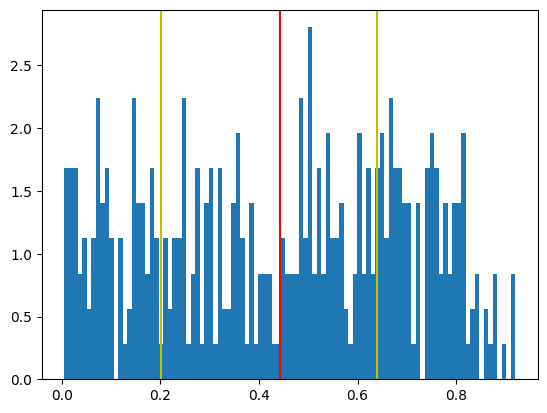

Cell Line 14 IMR.90
GaussianMixture(covariance_type='spherical', n_init=10)
AIC 43.661604391064884 BIC 51.59389786931227 score -0.05084821075777549
Gaussian 0 mean= [0.44336716] wgt= 1.0 cov= 0.06481843552883995
GaussianMixture(covariance_type='spherical', n_components=2, n_init=10)
AIC -26.261799007962317 BIC -6.431065312343854 score 0.046489485907644
Gaussian 0 mean= [0.6392383] wgt= 0.5521896437230643 cov= 0.018319694453466456
Gaussian 1 mean= [0.20184077] wgt= 0.4478103562769357 cov= 0.016512437227753446
GaussianMixture(covariance_type='spherical', n_components=3, n_init=10)
AIC -35.41911074229902 BIC -3.689936829309481 score 0.0659219368491013
Gaussian 0 mean= [0.44812008] wgt= 0.321911554281165 cov= 0.012883144420721719
Gaussian 1 mean= [0.71307194] wgt= 0.35343659668507615 cov= 0.009212275326059253
Gaussian 2 mean= [0.14503663] wgt= 0.32465184903375877 cov= 0.008638141533617092


In [14]:
filename = DATA_DIR + RCI_FILE
loader = RCI_Loader()

for CELL_LINE in range(15):
    gene_to_rci = loader.load_gene_rci_values(filename,CELL_LINE)
    logs = list(gene_to_rci.values())
    antilogs = np.power(2,logs)
    cyto_pct = [x/(1+x) for x in antilogs]
    values = np.array(cyto_pct)
    values = values.reshape(-1, 1)

    model_1 = GaussianMixture(n_components=1, verbose=0, covariance_type='spherical', n_init=10) 
    model_1.fit(values)
    model_2 = GaussianMixture(n_components=2, verbose=0, covariance_type='spherical', n_init=10) 
    model_2.fit(values)
    model_3 = GaussianMixture(n_components=3, verbose=0, covariance_type='spherical', n_init=10) 
    model_3.fit(values)
    
    discrim = model_2.weights_[0]*model_2.means_[0]+model_2.weights_[1]*model_2.means_[1]
    left =  model_2.means_[0]
    right = model_2.means_[1]
    plot(cyto_pct,left,right,discrim)
    
    print('Cell Line',CELL_LINE,all_cell_lines[CELL_LINE])
    show_gmm(model_1,values)
    show_gmm(model_2,values)
    show_gmm(model_3,values)